# Load Packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp
%matplotlib inline

# Load Data

In [0]:
data = pd.read_csv('query.csv')

In [0]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-01-26T11:06:51.505Z,8.7929,126.5611,110.77,4.4,mb,NaN,126.0,1.969,0.91,us,us60007gfp,2020-01-26T11:56:16.040Z,"29km E of Marihatag, Philippines",earthquake,12.2,9.1,0.100,29.0,reviewed,us,us
1,2020-01-17T11:03:22.734Z,5.6886,126.2047,104.76,4.8,mb,NaN,91.0,1.506,0.89,us,us700071lr,2020-01-17T11:26:01.040Z,"67km ESE of Caburan, Philippines",earthquake,8.1,7.7,0.058,92.0,reviewed,us,us
2,2020-01-17T04:28:06.427Z,5.9354,125.9539,166.71,4.7,mb,NaN,153.0,1.186,0.85,us,us700071h7,2020-01-17T04:44:18.040Z,"30km ESE of Mangili, Philippines",earthquake,10.6,4.9,0.093,35.0,reviewed,us,us
3,2020-01-17T03:39:47.476Z,6.0816,126.9251,187.92,4.7,mb,NaN,111.0,1.658,0.53,us,us700071gp,2020-01-17T03:55:46.040Z,"88km ESE of Pondaguitan, Philippines",earthquake,8.7,7.5,0.093,35.0,reviewed,us,us
4,2020-01-15T02:40:09.250Z,5.7411,126.9842,127.72,4.6,mb,NaN,108.0,1.921,0.65,us,us7000700s,2020-01-15T14:26:56.206Z,"112km SE of Pondaguitan, Philippines",earthquake,7.6,7.3,0.102,29.0,reviewed,us,us


In [0]:
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [0]:
data.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [0]:
data.time.min(), data.time.max()

('1950-06-04T07:29:51.000Z', '2020-01-26T11:06:51.505Z')

We have hourly peak demand data from 2011 to 2019.

# Hourly Earthquake

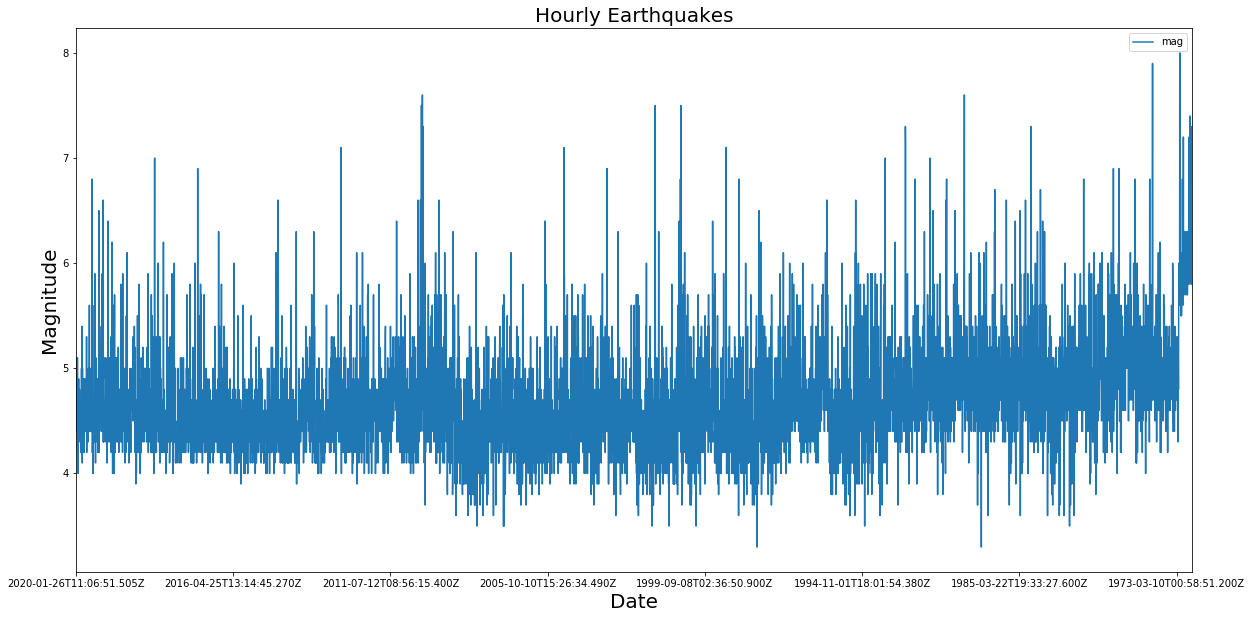

In [0]:
plt.subplots(figsize=(20, 10))
ax = data.set_index('time')['mag'].plot()
# data.set_index('time')['mag'].plot(ax=ax)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Magnitude', fontsize=20)
plt.title('Hourly Earthquakes', fontsize=20)
plt.legend()
plt.show()

# Modelling

Forecast the future.

In [0]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-01-26T11:06:51.505Z,8.7929,126.5611,110.77,4.4,mb,NaN,126.0,1.969,0.91,us,us60007gfp,2020-01-26T11:56:16.040Z,"29km E of Marihatag, Philippines",earthquake,12.2,9.1,0.100,29.0,reviewed,us,us
1,2020-01-17T11:03:22.734Z,5.6886,126.2047,104.76,4.8,mb,NaN,91.0,1.506,0.89,us,us700071lr,2020-01-17T11:26:01.040Z,"67km ESE of Caburan, Philippines",earthquake,8.1,7.7,0.058,92.0,reviewed,us,us
2,2020-01-17T04:28:06.427Z,5.9354,125.9539,166.71,4.7,mb,NaN,153.0,1.186,0.85,us,us700071h7,2020-01-17T04:44:18.040Z,"30km ESE of Mangili, Philippines",earthquake,10.6,4.9,0.093,35.0,reviewed,us,us
3,2020-01-17T03:39:47.476Z,6.0816,126.9251,187.92,4.7,mb,NaN,111.0,1.658,0.53,us,us700071gp,2020-01-17T03:55:46.040Z,"88km ESE of Pondaguitan, Philippines",earthquake,8.7,7.5,0.093,35.0,reviewed,us,us
4,2020-01-15T02:40:09.250Z,5.7411,126.9842,127.72,4.6,mb,NaN,108.0,1.921,0.65,us,us7000700s,2020-01-15T14:26:56.206Z,"112km SE of Pondaguitan, Philippines",earthquake,7.6,7.3,0.102,29.0,reviewed,us,us


In [0]:
data['time'] = pd.to_date(data['time'])
indexed_data = data.set_index("time").copy()

AttributeError: ignored

In [0]:
indexed_data.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time,,,,,,,,,,,,,,,,,,,,,
2020-01-26 11:06:51.505000+00:00,8.7929,126.5611,110.77,4.4,mb,NaN,126.0,1.969,0.91,us,us60007gfp,2020-01-26T11:56:16.040Z,"29km E of Marihatag, Philippines",earthquake,12.2,9.1,0.100,29.0,reviewed,us,us
2020-01-17 11:03:22.734000+00:00,5.6886,126.2047,104.76,4.8,mb,NaN,91.0,1.506,0.89,us,us700071lr,2020-01-17T11:26:01.040Z,"67km ESE of Caburan, Philippines",earthquake,8.1,7.7,0.058,92.0,reviewed,us,us
2020-01-17 04:28:06.427000+00:00,5.9354,125.9539,166.71,4.7,mb,NaN,153.0,1.186,0.85,us,us700071h7,2020-01-17T04:44:18.040Z,"30km ESE of Mangili, Philippines",earthquake,10.6,4.9,0.093,35.0,reviewed,us,us
2020-01-17 03:39:47.476000+00:00,6.0816,126.9251,187.92,4.7,mb,NaN,111.0,1.658,0.53,us,us700071gp,2020-01-17T03:55:46.040Z,"88km ESE of Pondaguitan, Philippines",earthquake,8.7,7.5,0.093,35.0,reviewed,us,us
2020-01-15 02:40:09.250000+00:00,5.7411,126.9842,127.72,4.6,mb,NaN,108.0,1.921,0.65,us,us7000700s,2020-01-15T14:26:56.206Z,"112km SE of Pondaguitan, Philippines",earthquake,7.6,7.3,0.102,29.0,reviewed,us,us


In [0]:
y_orig = indexed_data['mag']
yn = indexed_data['mag'].resample('M').count()

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


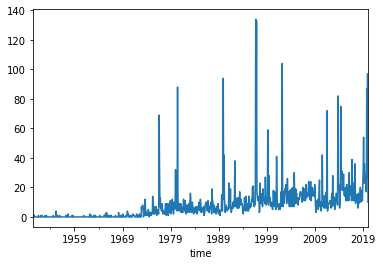

In [0]:
yn.plot()

In [0]:
# Check if there are empty/null days. Outputs zero if none
yn.isna().sum()

0

Data is clean.

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


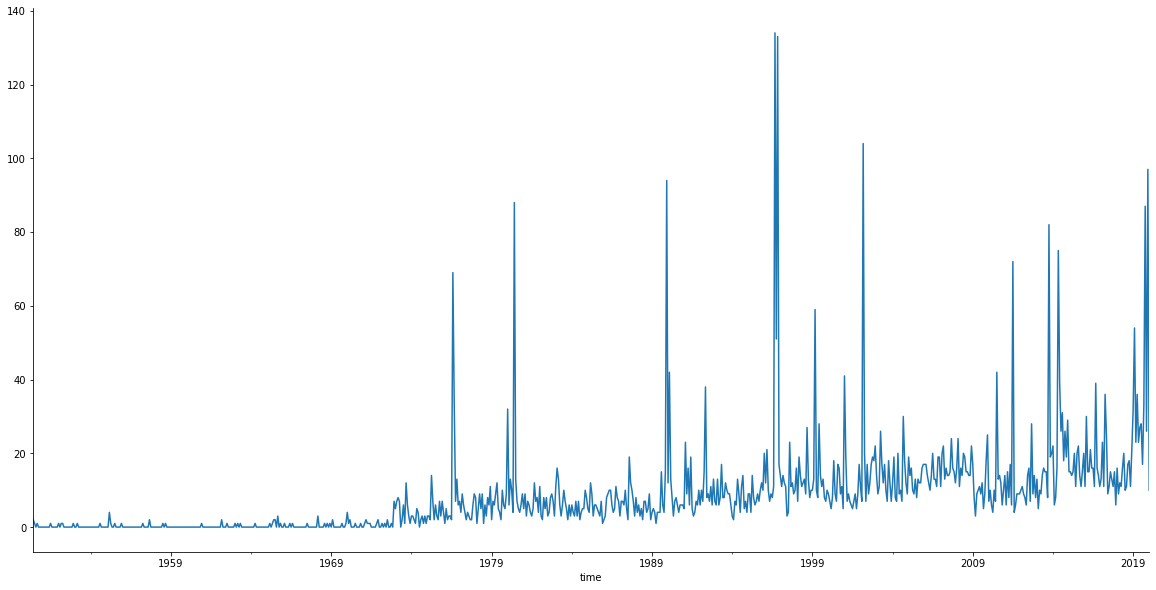

In [0]:
ax = plt.subplot()
ax = yn.plot(label='Number of Earthquakes', figsize=(20, 10))


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Forcast using Prophet

Prophet is an open source library published by Facebook that is based on decomposable (trend+seasonality+holidays) models. It provides us with the ability to make time series predictions with good accuracy using simple intuitive parameters and has support for including impact of custom seasonality and holidays!

Here's the resource for more information on [Prophet](https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/).

In [0]:
!pip install fbprophet

In [0]:
# Load Prophet
from fbprophet import Prophet
pd.options.display.max_columns = 999

In [0]:
yn_df.head()

,mag
time,
1950-06-30 00:00:00+00:00,2
1950-07-31 00:00:00+00:00,1
1950-08-31 00:00:00+00:00,0
1950-09-30 00:00:00+00:00,1
1950-10-31 00:00:00+00:00,0


In [0]:
# Reassign columns as input to Prophet
yn_df = pd.DataFrame(yn)
yn_df['y'] = yn_df['mag']
yn_df['ds'] = yn_df.index
yn_df['ds'] = yn_df['ds'].dt.tz_convert(None)
# yn_df['holiday'] = np.where(data['Holiday'] == 1, 'Y', 'N')

In [0]:
yn_df.head()

,mag,y,ds
time,,,
1950-06-30 00:00:00+00:00,2,2,1950-06-30
1950-07-31 00:00:00+00:00,1,1,1950-07-31
1950-08-31 00:00:00+00:00,0,0,1950-08-31
1950-09-30 00:00:00+00:00,1,1,1950-09-30
1950-10-31 00:00:00+00:00,0,0,1950-10-31


In [0]:
# Let's treat data before 2018 as train data and forecast for beyond 2018 as test data
date_split = '2018-01-01'
train, test = yn_df[:date_split], yn_df[date_split:]

In [0]:
train.shape, test.shape

((811, 3), (25, 3))

Around an 80-20 split looks reasonable.

In [72]:
# Forecast for how many months?

months = 12
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1, )

# Let's train the model
m.fit(train)
future = m.make_future_dataframe(periods=(test.shape[0]+(365 * months)))
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


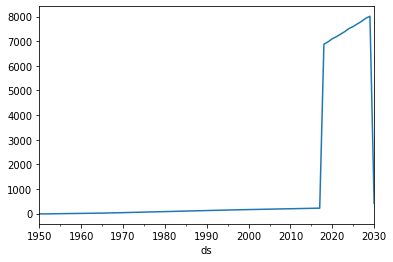

In [76]:
forecast.set_index('ds').resample('Y')['yhat'].sum().plot()

In [0]:
pd.options.display.max_rows = 999

In [84]:
forecast.set_index('ds').resample('Y')['yhat'].sum()

ds
1950-12-31      -8.815525
1951-12-31     -15.862515
1952-12-31     -13.326575
1953-12-31     -11.232801
1954-12-31      -8.806097
1955-12-31      -6.375690
1956-12-31      -3.839750
1957-12-31      -1.745976
1958-12-31       0.680728
1959-12-31       3.111135
1960-12-31       5.647075
1961-12-31       7.741460
1962-12-31      10.170075
1963-12-31      12.662528
1964-12-31      15.487690
1965-12-31      17.950697
1966-12-31      21.170811
1967-12-31      24.503685
1968-12-31      28.388879
1969-12-31      31.987751
1970-12-31      36.130920
1971-12-31      40.410534
1972-12-31      44.800639
1973-12-31      48.744729
1974-12-31      53.021328
1975-12-31      57.301629
1976-12-31      61.692109
1977-12-31      65.636200
1978-12-31      69.912800
1979-12-31      74.193101
1980-12-31      78.583581
1981-12-31      82.527672
1982-12-31      86.804271
1983-12-31      91.084573
1984-12-31      95.475053
1985-12-31      99.419144
1986-12-31     103.695743
1987-12-31     107.976044
1988-12-3

In [0]:
train.head()

,mag,y,ds
time,,,
1950-06-30 00:00:00+00:00,2,2,1950-06-30
1950-07-31 00:00:00+00:00,1,1,1950-07-31
1950-08-31 00:00:00+00:00,0,0,1950-08-31
1950-09-30 00:00:00+00:00,1,1,1950-09-30
1950-10-31 00:00:00+00:00,0,0,1950-10-31


In [0]:
train.dtypes

mag             int64
y               int64
ds     datetime64[ns]
dtype: object

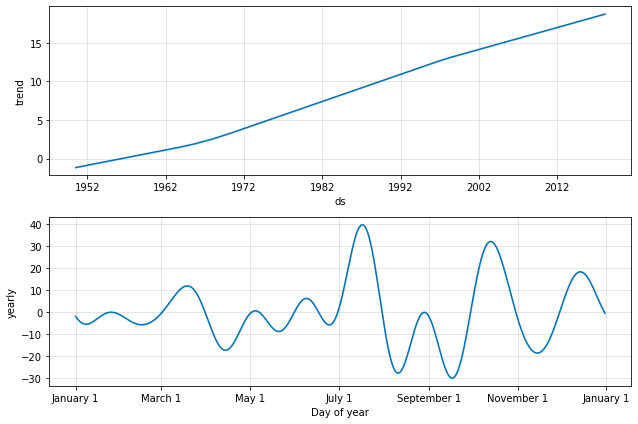

In [0]:
m.plot_components(forecast)
plt.show()

- We can see that the months with low demands are months ranging from January to December (as expected) since its colder.
- Looking at weekly trends, weekends always have lower demand.

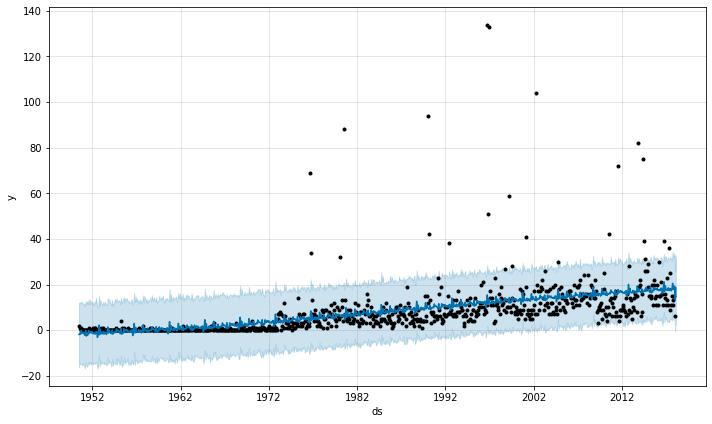

In [0]:
m.plot(forecast)
plt.show()

In [0]:
test_df = pd.merge(forecast.set_index('ds')['2018':].reset_index(), test, on='ds', how='left')
test_df.index = test_df['ds']

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



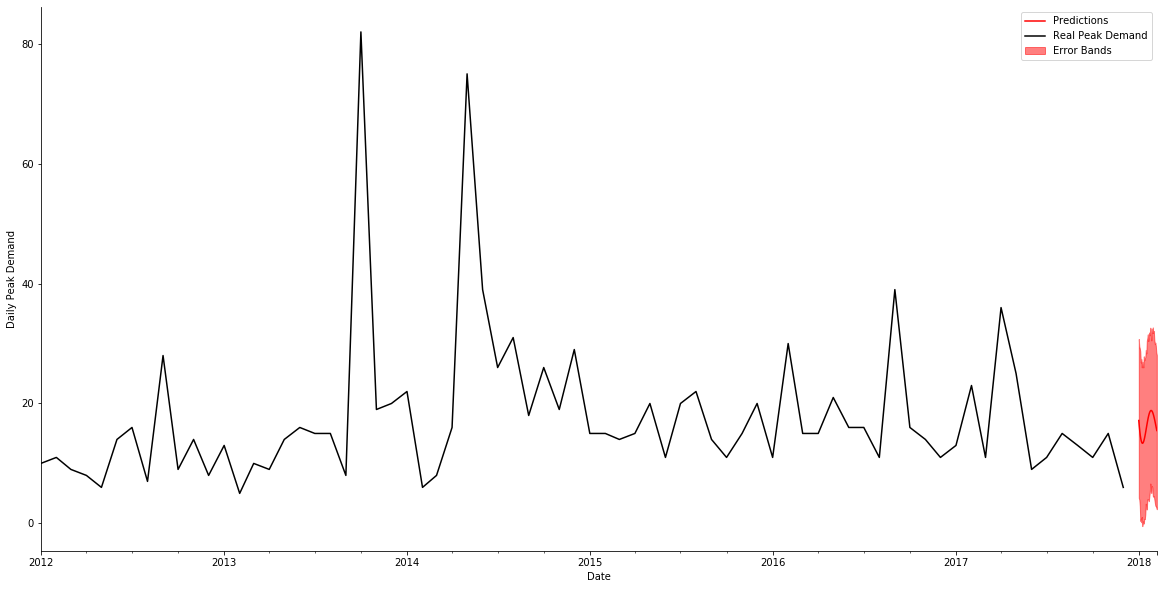

In [0]:
pd.plotting.register_matplotlib_converters()

ax = test_df.yhat.plot(figsize=(20, 10), color='r')

yn_df['2012-01-01':date_split].y.plot(ax=ax, color='k')
# test_df.yhat.plot(ax=ax, style='--', color='r')

ax.fill_between(test_df.index,
                test_df.yhat_lower,
                test_df.yhat_upper, color='r', alpha=.5)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Peak Demand')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(['Test', 'Training'])

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


plt.legend(['Predictions', 'Real Peak Demand', 'Error Bands'])
plt.show()


# Performance Metrics

In [0]:
# Cross Validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial = pd.to_timedelta(12,unit="M"), period = pd.to_timedelta(12,unit="M"), 
                         horizon = pd.to_timedelta(12,unit="M"))
df_cv.head()

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:208: FutureWarning:

M and Y units are deprecated and will be removed in a future version.

/usr/local/lib/python3.6/dist-packages/pandas/core/tools/timedeltas.py:134: FutureWarning:

M and Y units are deprecated and will be removed in a future version.

INFO:fbprophet:Making 66 forecasts with cutoffs between 1951-12-31 23:52:48 and 2016-12-30 18:10:48
INFO:fbprophet:n_changepoints greater than number of observations.Using 14.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1952-01-31,-0.348935,-0.756620,0.077467,1,1951-12-31 23:52:48
1,1952-02-29,-0.354842,-0.783264,0.061204,0,1951-12-31 23:52:48
2,1952-03-31,-0.381639,-0.815118,0.007500,1,1951-12-31 23:52:48
3,1952-04-30,-0.413994,-0.770073,-0.007537,1,1951-12-31 23:52:48
4,1952-05-31,-0.453447,-0.845215,-0.053656,0,1951-12-31 23:52:48


In [0]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-02-03,6825.986290,6387.116109,7252.408692,6509.1,2012-02-02
1,2012-02-04,6254.163854,5768.903979,6689.435096,5793.8,2012-02-02
2,2012-02-05,5884.513603,5441.207569,6277.066206,5519.4,2012-02-02
3,2012-02-06,6880.417579,6442.632501,7319.938209,6608.7,2012-02-02
4,2012-02-07,6964.335426,6521.095159,7408.297005,6733.9,2012-02-02


In [65]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, ['mape'])
df_p#.head()

INFO:fbprophet:Skipping MAPE because y close to 0


# Visualize Metrics

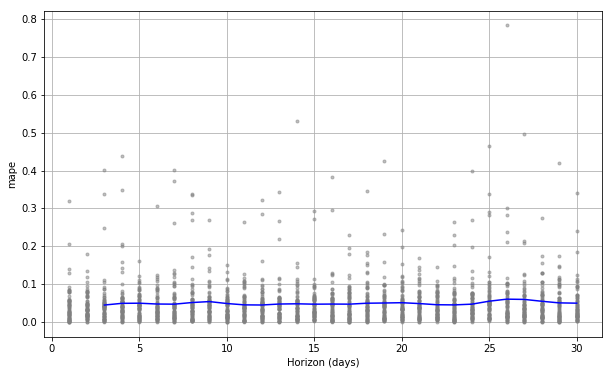

In [0]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')